<a href="https://colab.research.google.com/github/NSR98/FSI-IA/blob/master/Lego_BricksVGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Modelo VGG16

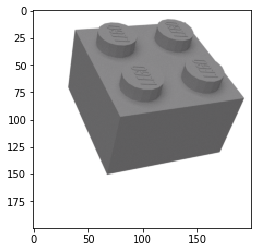

In [0]:
#!ls "/content/drive/My Drive/Colab Notebooks/datasets/Lego-Bricks"

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/datasets/Lego-Bricks/train/3003 Brick 2x2/0028.png', 'r')
imshow(np.asarray(pil_im))

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time

from keras.applications.vgg16 import VGG16


# DATA SOURCE --------------------------------------------------

batch_size = 20

data_dir = '/content/drive/My Drive/Colab Notebooks/datasets/Lego-Bricks/train'
#validation_data_dir = '/content/drive/My Drive/Colab Notebooks/datasets/Lego-Bricks/train'

datagen = ImageDataGenerator(rescale=1./255,   #Normalizar los valores RGB entre 0 y 1. Por defecto van de 0 a 255
                            validation_split=0.25)


train_generator = datagen.flow_from_directory(
        data_dir,
        target_size=(200, 200),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle = True)

validation_generator = datagen.flow_from_directory(
        data_dir,
        target_size=(200, 200),
        batch_size=batch_size,
        class_mode='categorical', 
        shuffle = False)

# MODEL --------------------------------------------------

modelVGG16 = VGG16(include_top=True, weights=None, input_tensor=None, input_shape=(200,200,3), pooling=None, classes=16)

modelVGG16.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.sgd(),
              metrics=['accuracy'])

modelVGG16.summary()

Found 6379 images belonging to 16 classes.
Found 6379 images belonging to 16 classes.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
________________________________________________________

In [0]:
# TRAINING --------------------------------------------------

data = modelVGG16.fit_generator(
        train_generator,
        steps_per_epoch= 239,
        epochs=20, 
        validation_data=validation_generator,
        validation_steps= 80,
)

Epoch 1/20
239/239 [==============================] - 87s 366ms/step - loss: 2.7697 - acc: 0.0977 - val_loss: 2.7672 - val_acc: 0.0050
Epoch 2/20
239/239 [==============================] - 84s 353ms/step - loss: 2.6696 - acc: 0.1980 - val_loss: 1.7794 - val_acc: 0.4387
Epoch 3/20
239/239 [==============================] - 80s 333ms/step - loss: 1.4817 - acc: 0.4689 - val_loss: 0.5426 - val_acc: 0.9037
Epoch 4/20
239/239 [==============================] - 80s 334ms/step - loss: 0.9110 - acc: 0.6521 - val_loss: 1.0748 - val_acc: 0.5660
Epoch 5/20
239/239 [==============================] - 80s 334ms/step - loss: 0.6869 - acc: 0.7380 - val_loss: 0.7239 - val_acc: 0.7606
Epoch 6/20
239/239 [==============================] - 80s 334ms/step - loss: 0.5407 - acc: 0.7975 - val_loss: 0.5923 - val_acc: 0.7131
Epoch 7/20
239/239 [==============================] - 80s 334ms/step - loss: 0.4369 - acc: 0.8328 - val_loss: 0.3963 - val_acc: 0.9175
Epoch 8/20
239/239 [==============================] - 8

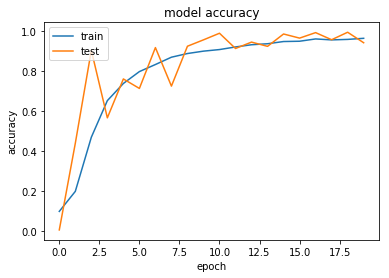

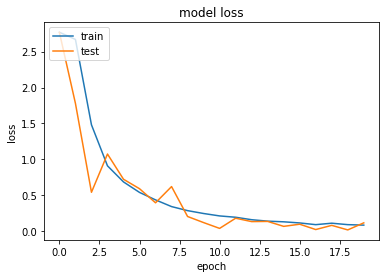

In [0]:
import matplotlib.pyplot as plt

# accuracy
plt.plot(data.history['acc'])
plt.plot(data.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss
plt.plot(data.history['loss'])
plt.plot(data.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
from keras.preprocessing import image

img_path = '/content/drive/My Drive/Colab Notebooks/datasets/Lego-Bricks/train/3069 Flat Tile 1x2/0002.png'
img = image.load_img(img_path, target_size=(200,200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

label_map = (train_generator.class_indices)
print(label_map)

features = modelVGG16.predict(x)
print(features)

{'11214 Bush 3M friction with Cross axle': 0, '18651 Cross Axle 2M with Snap friction': 1, '2357 Brick corner 1x2x2': 2, '3003 Brick 2x2': 3, '3004 Brick 1x2': 4, '3005 Brick 1x1': 5, '3022 Plate 2x2': 6, '3023 Plate 1x2': 7, '3024 Plate 1x1': 8, '3040 Roof Tile 1x2x45deg': 9, '3069 Flat Tile 1x2': 10, '32123 half Bush': 11, '3673 Peg 2M': 12, '3713 Bush for Cross Axle': 13, '3794 Plate 1X2 with 1 Knob': 14, '6632 Technic Lever 3M': 15}
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
